Algoritmos

In [ ]:
'''
Implemente dois algoritmos para obter a mediana de uma lista de elementos. 
Um dos algoritmos deve ser baseado no método força bruta e o outro no método diminuir para conquistar. 
Os dois algoritmos devem ser implementados em Python (sem utilizar nenhuma biblioteca externa). 
Eles devem receber como parâmetro uma lista de elementos e devem retornar a mediana da lista. 
Você também deve montar um experimento que permita comparar o desempenho dos dois algoritmos através de um gráfico. 
Você deve entregar um arquivo no formato PDF, contendo:
1) O código dos dois algoritmos;
1) O valor do domínio;
2) A figura gerada pelo experimento e que permite comparar os dois algoritmos.

'''

def Mediana_NaiveSelect(A,l,r,k):
  L=sorted(A)
  k=(len(L)-1)//2 #retorna inteiro da divisão
  return L[k]

def Swap (A,i,j):
  aux= A[i]
  A[i]=A[j]
  A[j]=aux

def LomutoPartition(A,l,r):
  p=A[l]
  s=l
  for i in range(l+1,r):
    if A[i]<p:
      s=s+1
      Swap(A,s,i)
  Swap(A,l,s)
  return s

def Mediana_QuickSelect(A,l,r,k):
    s=LomutoPartition(A,l,r)
    if(s==k-1):
        return A[s]
    else:
        if(s>k-1):
            return Mediana_QuickSelect(A,l,s-1,k)
        else:
            return Mediana_QuickSelect(A,s+1,r,k)
    return s
    
#testando...    
L = [2,6,8,1,4,9,10]
print("Lista original:",L)
print("")

L = [2,6,8,1,4,9,10] #garantindo valores originais da lista
print("Lista NaiveSelect mediana  :",Mediana_NaiveSelect(L,0,len(L)-1,(len(L)+1)/2))
print("Lista NaiveSelect ordenado :",L)
print("")

L = [2,6,8,1,4,9,10] #garantindo valores originais da lista
print("Lista QuickSelect mediana  :",Mediana_QuickSelect(L,0,len(L)-1,(len(L)+1)/2))
print("Lista QuickSelect ordenado :",L)
print("")

Lista original: [2, 6, 8, 1, 4, 9, 10]

Lista NaiveSelect mediana  : 6
Lista NaiveSelect ordenado : [2, 6, 8, 1, 4, 9, 10]

Lista QuickSelect mediana  : 6
Lista QuickSelect ordenado : [1, 2, 4, 6, 8, 9, 10]



Coleta de dados dos experimentos

In [ ]:
from numpy import random
#Você deve escolher um domínio mais adequado
DOMAIN = 100
def avg_time(domain, tam, func, rounds): 
  sum = float(0)
  for i in range(rounds):
    #create a list with random numbers
    random.seed(i)
    A=list(random.randint(tam+domain, size=tam))
    l=0
    r=len(A)-1
    K=(len(A)+1)//2
    #start = time.time()
    func(A,l,r,k)
    end = time.time()
    sum += end-start
  return sum/rounds

#defines the algorithms to be processed
algorithms = [Mediana_NaiveSelect, Mediana_QuickSelect]

#defines the number of times each algorithm will be processed to find the average time
num_rounds = 1 

sizes = [5,10,15,20,25] ##você deve escolher tamanhos mais adequados
mapSizeToTime = dict()
for i in range(5):
  print(f"Starting round {i+1}, size={sizes[i]}")
  
  ##Map list size to algorithm average time
  for algorithm in algorithms:      
    mapSizeToTime[f"{algorithm.__name__ }##{sizes[i]}"] = avg_time(DOMAIN, sizes[i], algorithm, num_rounds)
  
print(f"Finish data collection")

Starting round 1, size=5


NameError: ignored

Formata os dados do experimento para serem exibidos

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(mapSizeToTime, orient='index',columns=['Time'])
df['Algorithm'] = [i.split("##")[0] for i in df.index]
df['Size'] = [int(i.split("##")[1]) for i in df.index]
df

,Time,Algorithm,Size
BubbleSort##5,0.000010,BubbleSort,5
Mediana_NaiveSelect##5,0.000005,Mediana_NaiveSelect,5


Resultado do experimento (gráfico)

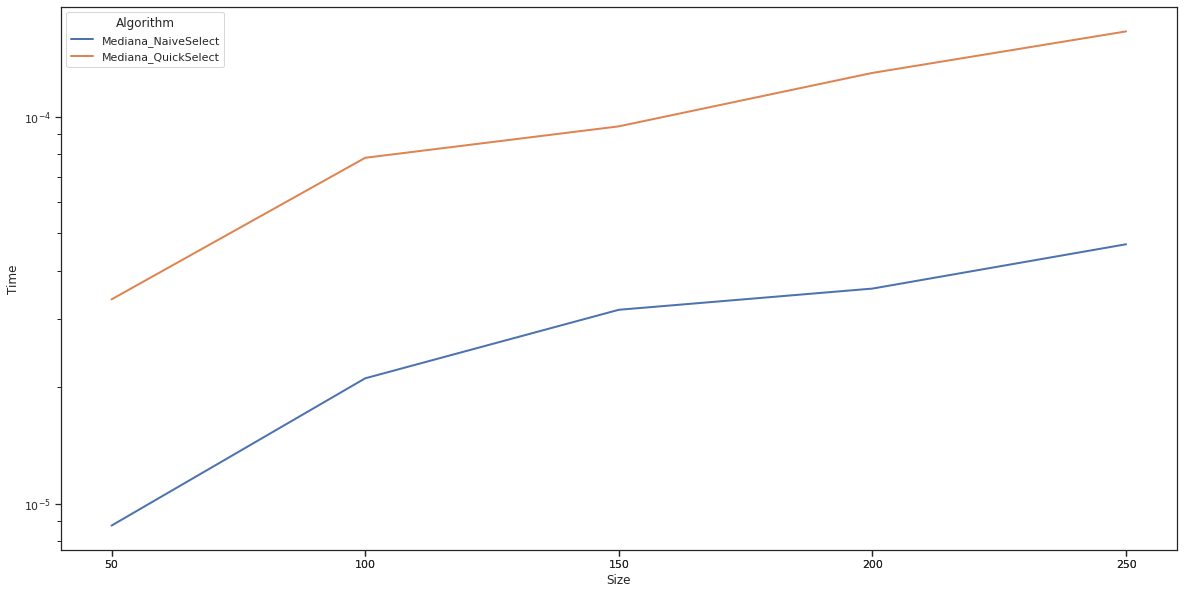

In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
 
##Defines font size and line width
sns.set(font_scale=1, style="ticks", rc={"lines.linewidth": 2})
 
##Defines plot size
plt.rcParams['figure.figsize'] = [20, 10]
 
g = sns.lineplot(x='Size', y='Time', hue='Algorithm', data=df)
g.set_yscale('log')
g.set(xticks=[i for i in df.Size])
plt.show()